Topic:        Challenge Set 7

Subject:      Classifications

Date:         02/05/2018

Name:         Will Stokvis

Worked with:  Matias Beeck, Audrey Baker, Brad Davies, Kevin Stern

In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Challenge 1

In [8]:
columns = ['party','handicapped-infants','water-project-cost-sharing', 'adoption-of-the-budget-resolution',\
          'physician-fee-freeze','el-salvador-aid','religious-groups-in-schools','anti-satellite-test-ban',\
          'aid-to-nicaraguan-contras','mx-missile','immigration','synfuels-corporation-cutback','education-spending',\
          'superfund-right-to-sue','crime','duty-free-exports','export-administration-act-south-africa']

In [42]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                names = columns)

In [43]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [46]:
df = df.replace('y',1)
df = df.replace('n',0)

In [47]:
df.apply(lambda x: x.replace('?', np.nan,axis=1, inplace = True));
df.fillna(df.mean(), inplace = True)

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,democrat,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,democrat,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,democrat,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,democrat,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,democrat,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,republican,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,democrat,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [48]:
df.dtypes

party                                      object
handicapped-infants                       float64
water-project-cost-sharing                float64
adoption-of-the-budget-resolution         float64
physician-fee-freeze                      float64
el-salvador-aid                           float64
religious-groups-in-schools               float64
anti-satellite-test-ban                   float64
aid-to-nicaraguan-contras                 float64
mx-missile                                float64
immigration                               float64
synfuels-corporation-cutback              float64
education-spending                        float64
superfund-right-to-sue                    float64
crime                                     float64
duty-free-exports                         float64
export-administration-act-south-africa    float64
dtype: object

#### Challenge 2

In [54]:
from sklearn.cross_validation import train_test_split
X = df.iloc[:, 1:]
y = df['party']
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 4444)

#### Challenge 3

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [130]:
k_scores = []
for i in list(range(1,21)):
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(X_train, Y_train)
    y_pred = KNN.predict(x_test)
    k_scores.append(accuracy_score(y_test,y_pred))
    print (str(i) + ' neighbors: ' +  str(accuracy_score(y_test,y_pred)))
print ('K-Neighbors of '+ str(k_scores.index(max(k_scores))) + ' has a score of ' + str(max(k_scores)))

1 neighbors: 0.900763358779
2 neighbors: 0.893129770992
3 neighbors: 0.900763358779
4 neighbors: 0.900763358779
5 neighbors: 0.916030534351
6 neighbors: 0.931297709924
7 neighbors: 0.916030534351
8 neighbors: 0.923664122137
9 neighbors: 0.931297709924
10 neighbors: 0.931297709924
11 neighbors: 0.923664122137
12 neighbors: 0.923664122137
13 neighbors: 0.923664122137
14 neighbors: 0.923664122137
15 neighbors: 0.923664122137
16 neighbors: 0.923664122137
17 neighbors: 0.923664122137
18 neighbors: 0.916030534351
19 neighbors: 0.916030534351
20 neighbors: 0.916030534351
K-Neighbors of 5 has a score of 0.931297709924


#### Challenge 4

In [101]:
from sklearn.linear_model import LogisticRegression

In [105]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
pred = logreg.predict(x_test)
print ('The test accuracy is ' + str(accuracy_score(y_test, pred)))

The test accuracy is 0.93893129771


#### Challenge 5

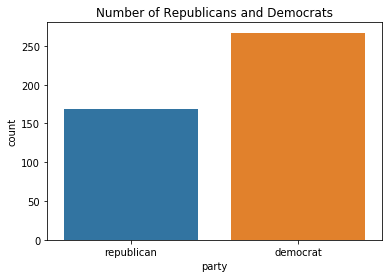

In [114]:
sns.countplot(x = 'party',data = df)
plt.title('Number of Republicans and Democrats');

In [115]:
def dPred(x):
    return ['democrat'] * len(x)

def rPred(x):
    return ['republican'] * len(x)

In [126]:
print ('If everyone were a Democrat, we would be accurate '+\
       str(round(accuracy_score(y_test,dPred(x_test)),4)) + '% of the time'\
        ' and \nif everyone were a Republican, we would be accurate '+\
       str(round(accuracy_score(y_test,rPred(x_test)),4)) + '% of the time')

If everyone were a Democrat, we would be accurate 0.5878% of the time and 
if everyone were a Republican, we would be accurate 0.4122% of the time


#### Challenge 6

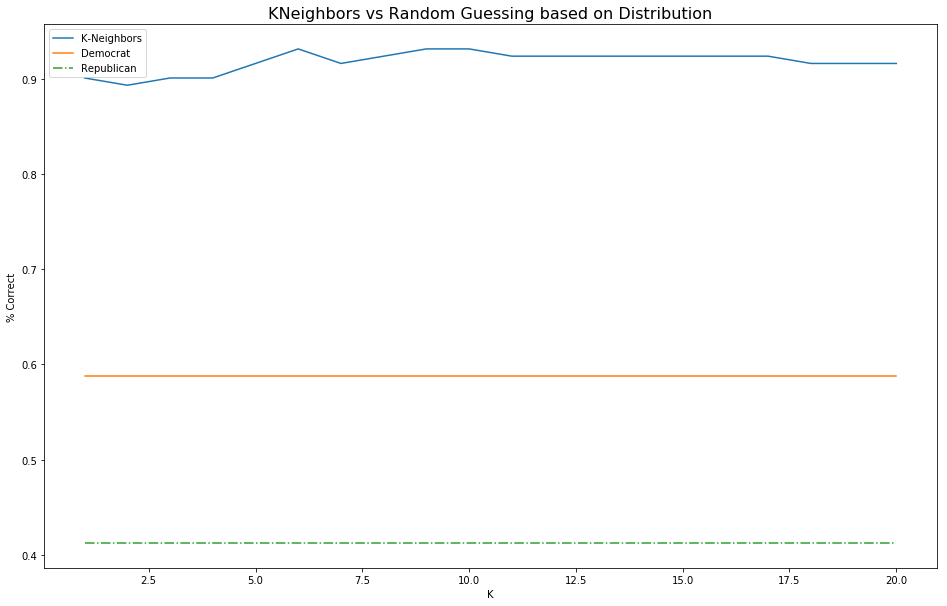

In [175]:
dem = []
rep = []
for i in list(range(1,21)):
    dem.append(accuracy_score(y_test,dPred(x_test)))
    rep.append(accuracy_score(y_test,rPred(x_test)))
plt.figure(figsize = (16,10))
plt.plot(list(range(1,21)),k_scores)
plt.plot(list(range(1,21)),dem,'-')
plt.plot(list(range(1,21)),rep,'-.')
plt.title('KNeighbors vs Random Guessing based on Distribution',fontsize = 16)
plt.ylabel('% Correct')
plt.xlabel('K')
plt.legend(('K-Neighbors', 'Democrat', 'Republican'));

#### Challenge 7

In [174]:
from sklearn.learning_curve import learning_curve

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [177]:
learning_curve(logreg,X,y)

(array([ 29,  94, 159, 224, 290]),
 array([[ 1.        ,  0.96551724,  0.96551724],
        [ 0.9893617 ,  0.9787234 ,  0.9787234 ],
        [ 0.98113208,  0.97484277,  0.97484277],
        [ 0.98214286,  0.97321429,  0.98214286],
        [ 0.96896552,  0.96551724,  0.97241379]]),
 array([[ 0.97241379,  0.89655172,  0.88965517],
        [ 0.97241379,  0.91724138,  0.89655172],
        [ 0.97241379,  0.93103448,  0.91724138],
        [ 0.97241379,  0.95172414,  0.93103448],
        [ 0.97931034,  0.96551724,  0.93793103]]))

In [183]:
m, train_cv_err, test_cv_err = learning_curve(logreg,X,y)[0], np.mean(learning_curve(logreg,X,y)[1], axis=1),np.mean(learning_curve(logreg,X,y)[2], axis=1)

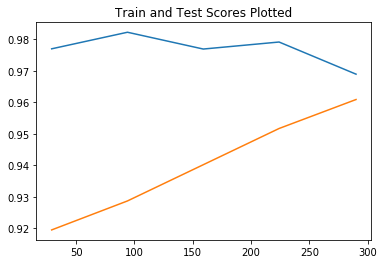

In [186]:
plt.plot(m,train_cv_err)
plt.plot(m,test_cv_err)
plt.title('Train and Test Scores Plotted');

#### Challenge 8 + 9

In [210]:
from sklearn.cross_validation import cross_val_score

In [218]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
model_gnb = gnb.fit(X_train, Y_train)
gnb_pred = model_gnb.predict(x_test)
print(accuracy_score(y_test, gnb_pred))
print(cross_val_score(model_gnb, x_test, y_test, cv = 10, scoring='accuracy').mean())

0.93893129771
0.955402930403


In [219]:
from sklearn.svm import SVC
svc = SVC()
model_svc = svc.fit(X_train, Y_train)
svc_pred = model_svc.predict(x_test)
print(accuracy_score(y_test, svc_pred))
print(cross_val_score(model_svc, x_test, y_test, cv = 10, scoring='accuracy').mean())

0.954198473282
0.955402930403


In [222]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
model_dtc = dtc.fit(X_train, Y_train)
dtc_pred = model_dtc.predict(x_test)
print(accuracy_score(y_test, dtc_pred))
print(cross_val_score(model_dtc, x_test, y_test, cv = 10, scoring='accuracy').mean())

0.931297709924
0.961996336996


In [224]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model_rfc = rfc.fit(X_train, Y_train)
rfc_pred = model_rfc.predict(x_test)
print(accuracy_score(y_test, rfc_pred))
print(cross_val_score(model_rfc, x_test, y_test, cv = 10, scoring='accuracy').mean())

0.946564885496
0.94826007326


#### Challenge 10

In [225]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',\
                names = columns)

In [236]:
df = df.replace('y',1)
df = df.replace('n',1)

In [250]:
df.apply(lambda x: x.replace('?', np.nan,axis=1, inplace = True));
df.replace(np.nan,df.mode(), inplace = True)

/Users/williamstokvis/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3786: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


In [252]:
df.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0
2,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0


In [253]:
X_train, x_test, Y_train, y_test = train_test_split(X,y, test_size=0.30, random_state = 4444)

In [257]:
cross_val_score(KNN, x_test, y_test, cv = 10, scoring='accuracy').mean()

0.88058608058608068